The following analysis aims to uncover key trends and patterns in customer behavior, identify factors influencing cancellations, and provide data-driven insights for optimizing hotel operations.

In [1]:
# Import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Import hotel_bookings.csv

df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# The dimensions of our DataFrame

df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Summary statistics

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Cleaning

In [6]:
# Missing values in each column 

null_count = df.isnull().sum()
total_rows = len(df)

null_percentage = (null_count / total_rows) * 100

null = pd.DataFrame({'Null Values': null_count, 'Percentage Of Null Values': null_percentage})

print(null)

                                Null Values  Percentage Of Null Values
hotel                                     0                   0.000000
is_canceled                               0                   0.000000
lead_time                                 0                   0.000000
arrival_date_year                         0                   0.000000
arrival_date_month                        0                   0.000000
arrival_date_week_number                  0                   0.000000
arrival_date_day_of_month                 0                   0.000000
stays_in_weekend_nights                   0                   0.000000
stays_in_week_nights                      0                   0.000000
adults                                    0                   0.000000
children                                  4                   0.003350
babies                                    0                   0.000000
meal                                      0                   0.000000
countr

In [7]:
# Replace null values in 'children' and 'agent' columns with 0
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# Replace missing values in 'country' with the most frequent value 
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Drop the 'company' column since it’s not needed for analysis
df.drop('company', axis=1, inplace=True)


print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [8]:
# Convert wrong data types 

df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the data types after the conversion

print(df['children'].dtype)
print(df['agent'].dtype)
print(df['reservation_status_date'].dtype)

int64
int64
datetime64[ns]


In [9]:
# Remove rows where there are no guests 

df = df.query('not (children == 0 and adults == 0 and babies == 0)')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


I will divide data into numerical and categorical data for more precise analysis, visualization, and modeling

In [10]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

numerical_df.head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0,0,0,0,0,3,0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0,0,0,0,0,4,0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,304,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,240,0,98.00,0,1
5,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,240,0,98.00,0,1
6,0,0,2015,27,1,0,2,2,0,0,0,0,0,0,0,0,107.00,0,0
7,0,9,2015,27,1,0,2,2,0,0,0,0,0,0,303,0,103.00,0,1
8,1,85,2015,27,1,0,3,2,0,0,0,0,0,0,240,0,82.00,0,1
9,1,75,2015,27,1,0,3,2,0,0,0,0,0,0,15,0,105.50,0,0


In [11]:
categorical_df= df[['hotel' , 'is_canceled' , 'arrival_date_year' , 'arrival_date_month' ,

           'meal' , 'country' , 'market_segment' , 'distribution_channel' ,

           'is_repeated_guest', 'deposit_type', 'customer_type', 'reservation_status']]

categorical_df

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,2015,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out
1,Resort Hotel,0,2015,July,BB,PRT,Direct,Direct,0,No Deposit,Transient,Check-Out
2,Resort Hotel,0,2015,July,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out
3,Resort Hotel,0,2015,July,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out
4,Resort Hotel,0,2015,July,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,BB,BEL,Offline TA/TO,TA/TO,0,No Deposit,Transient,Check-Out
119386,City Hotel,0,2017,August,BB,FRA,Online TA,TA/TO,0,No Deposit,Transient,Check-Out
119387,City Hotel,0,2017,August,BB,DEU,Online TA,TA/TO,0,No Deposit,Transient,Check-Out
119388,City Hotel,0,2017,August,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out


# Exploratory Data Analysis (EDA)

In [12]:
# Correlation between different numerical variables

Correlation_Matrix = numerical_df.corr()

Correlation_Matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.010627,0.029043,0.037389,0.097939


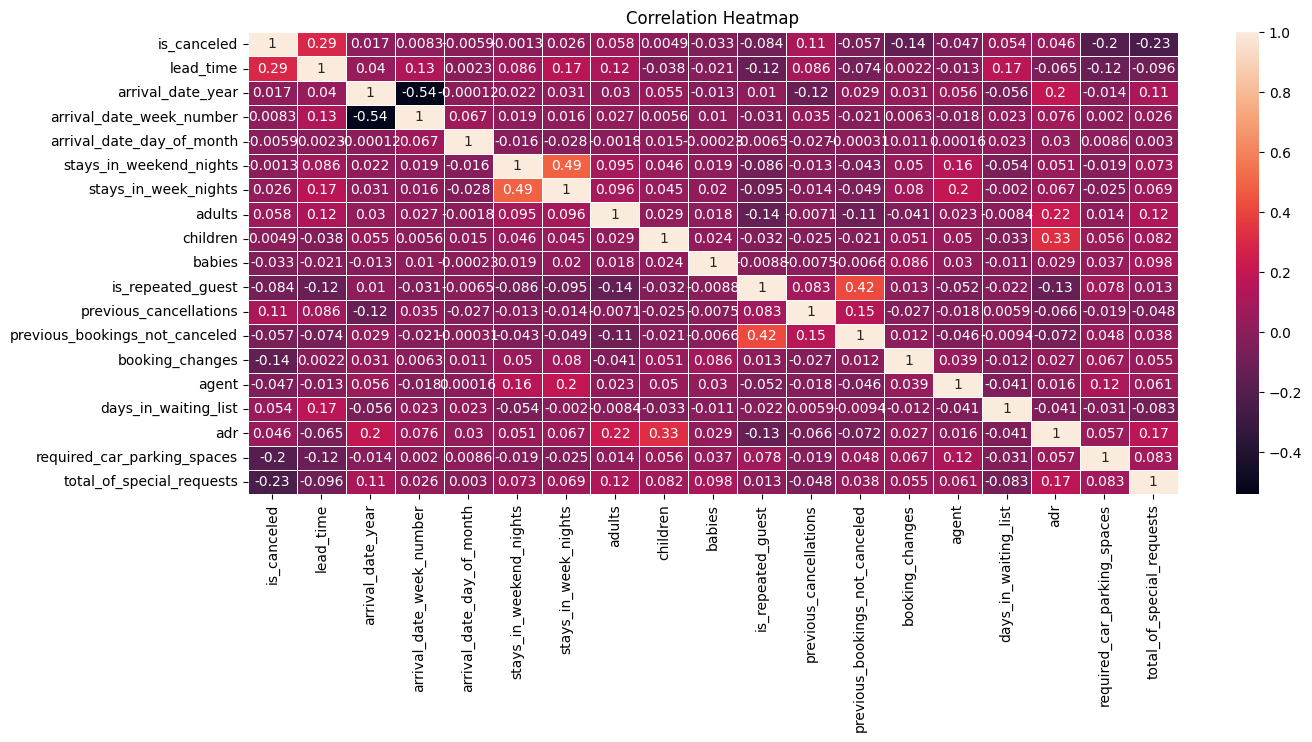

In [13]:
plt.figure(figsize=(15, 6))

sns.heatmap(Correlation_Matrix, annot=True, linewidths=0.6)

plt.title('Correlation Heatmap')


plt.show()

* The positive correlation between previous_bookings_not_canceled and is_repeated_guest indicates that guests who have made more bookings in the past are more likely to be repeat guests

* The variables stays_in_weekend_nights and stays_in_week_nights  are positively correlated, which is logical because they both add to the total length of stay. Merging these two features into one total length of stay could be useful

In [14]:
# Unique value counts for each categorical column

for col in categorical_df.columns:
    print(f"Column: {col}")
    print(categorical_df[col].value_counts())
    print("-" * 30)


Column: hotel
hotel
City Hotel      79163
Resort Hotel    40047
Name: count, dtype: int64
------------------------------
Column: is_canceled
is_canceled
0    75011
1    44199
Name: count, dtype: int64
------------------------------
Column: arrival_date_year
arrival_date_year
2016    56623
2017    40620
2015    21967
Name: count, dtype: int64
------------------------------
Column: arrival_date_month
arrival_date_month
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: count, dtype: int64
------------------------------
Column: meal
meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: count, dtype: int64
------------------------------
Column: country
country
PRT    48961
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA      

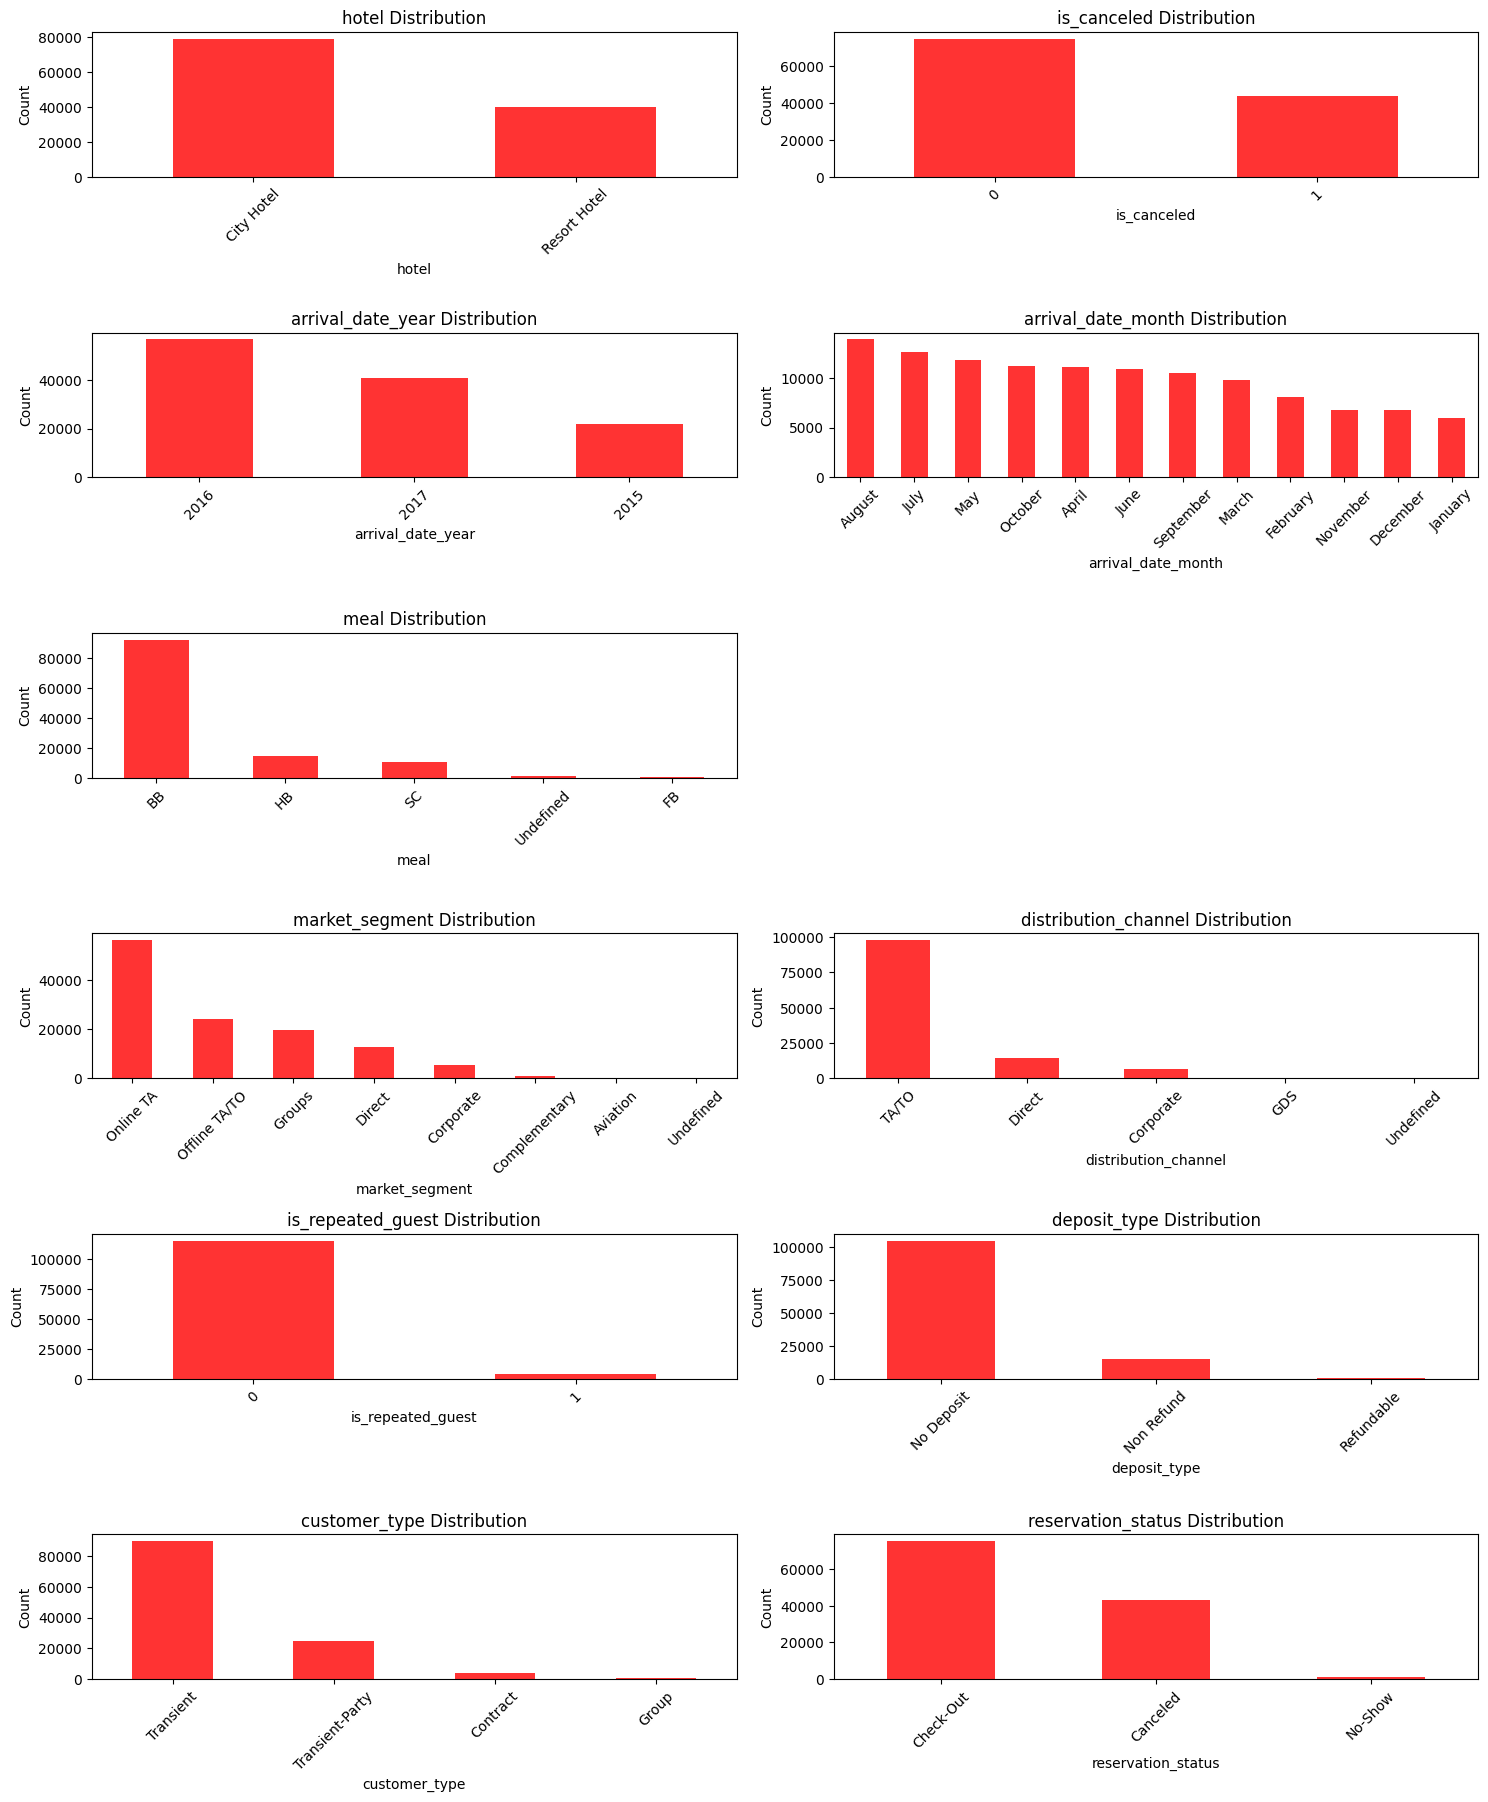

In [15]:
#
def plot_categorical_distribution(data, columns):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns):
        if col != 'country':  # Exclude the 'country' column
            plt.subplot(len(columns) // 2 + 1, 2, i + 1)
            data[col].value_counts().plot(kind='bar', color='red', alpha=0.8)
            plt.title(f'{col} Distribution')
            plt.ylabel('Count')
            plt.xlabel(col)
            plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_categorical_distribution(categorical_df, categorical_df.columns)


* City hotels are more popular than resort hotels, which may indicate that they provide easy access to business districts, conference centers, and a range of entertainment options, making them an optimal choice for both business and leisure travelers

* A high cancellation rate (37%) indicates the necessity for an analysis of the reasons behind these cancellations. It is important to consider the impact of seasonal trends on booking behavior

* The highest number of bookings occurs during the summer months, which correlates with the vacation periods taken by many individuals and families. In contrast, the low volume of bookings observed in January aligns with typical seasonal patterns. After the holiday season, many people tend to prioritize recovery from the expenses and activities of December, leading to a natural decline in travel

* The Bed & Breakfast option is highly favored,

* Digital platforms are leading the way. It'd be a good idea to invest in digital marketing and work with online travel agencies, as this could really help boost booking rates. Online travel agencies use all kinds of digital marketing techniques, like search engine optimization (SEO), pay-per-click (PPC) advertising, social media marketing, and email campaigns, to reach potential travelers

* The low percentage of repeat guests and the domination of transient customers indicate that hotels are visited by individuals or groups with specific, short-term reasons for staying, such as business trips, vacations, or events. In order to identify areas for improvement and to explore and implement targeted strategies aimed at encouraging repeat visits, hotels should consider gathering feedback from guests



In [16]:
# Top Guest Countries

guests_by_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['Country', 'Number of guests']
guests_by_country

,Country,Number of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [17]:
guests_map = px.choropleth(
    guests_by_country,  
    locations = guests_by_country ['Country'],  
    color = guests_by_country ['Number of guests'],  
    hover_name = guests_by_country ['Country'],  
    title='Guest Distribution by Country',  
    color_continuous_scale=px.colors.sequential.deep
)

guests_map.show()

Portugal (PRT) is the country with the highest number of guests, followed by other European countries. It might be a good idea to tailor the marketing strategies for other key countries to boost international bookings.

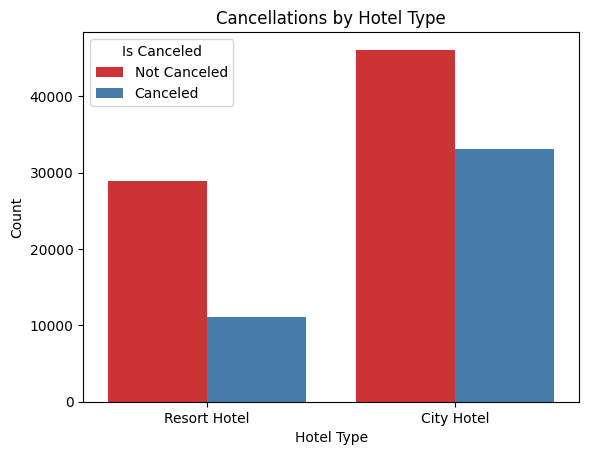

In [18]:

sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Set1')
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', loc='upper left', labels=['Not Canceled', 'Canceled'])
plt.show()


Resort hotels have lower cancellation rates because guests stay longer and often pay in advance. City hotels have higher cancellation rates because business travel is unpredictable and guests often cancel at the last minute. In cities, there are many accommodation options, so travelers can easily switch to something better.

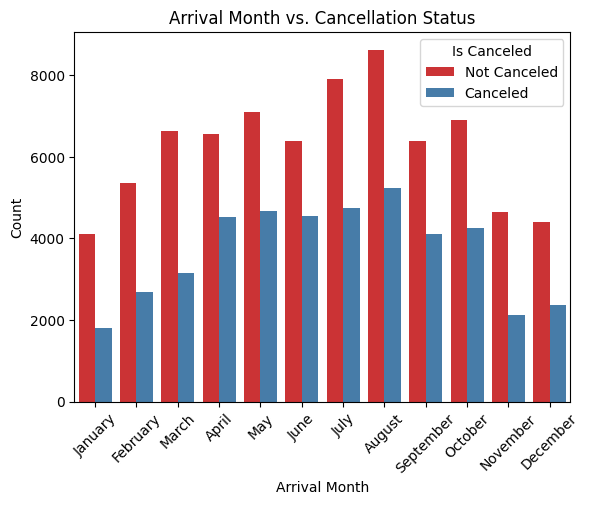

In [19]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, palette='Set1', order=month_order)
plt.title('Arrival Month vs. Cancellation Status')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Is Canceled', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()


There is a clear seasonal trend in canceled and non-canceled bookings, which provides insight into customer behavior and hotel occupancy patterns. Both canceled and not-canceled bookings reach their highest point during the summer months, particularly in July and August. This is likely due to the vacation season and increased tourism. In contrast, winter months, especially January and February, see a significant decline in canceled and not-canceled bookings, indicating lower demand.
To address these fluctuations, the hotel could implement stricter cancellation policies during peak seasons. This would reduce cancellations and maximize occupancy and revenue. This approach may encourage guests to commit to their reservations, leading to a more stable booking environment.

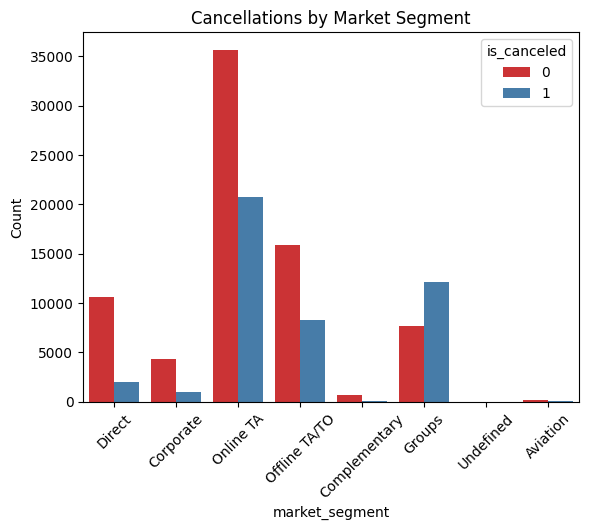

In [20]:
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='Set1')
plt.title('Cancellations by Market Segment')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()




Online TA: There are a lot of bookings, but a relatively high cancellation rate, probably because it's so easy to book and cancel online.

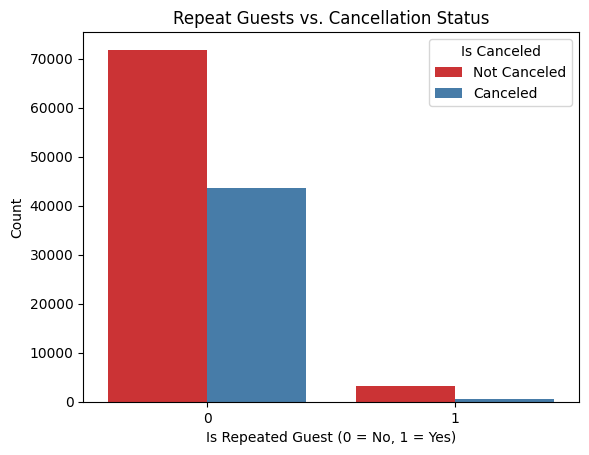

In [21]:

sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df, palette='Set1')
plt.title('Repeat Guests vs. Cancellation Status')
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Is Canceled', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()


The number of repeated guests is considerably lower than that of new guests. It is also notable that, the cancellation rate among repeated guests is notably lower than that of new guests. This indicates that once guests have had a positive experience, they are more likely to commit to their reservations and less likely to cancel. This points to a challenge for businesses in retaining customers and encouraging repeat visits. While attracting new guests is essential for growth, fostering loyalty among existing customers is equally important for long-term success

/tmp/ipykernel_17/2518717234.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



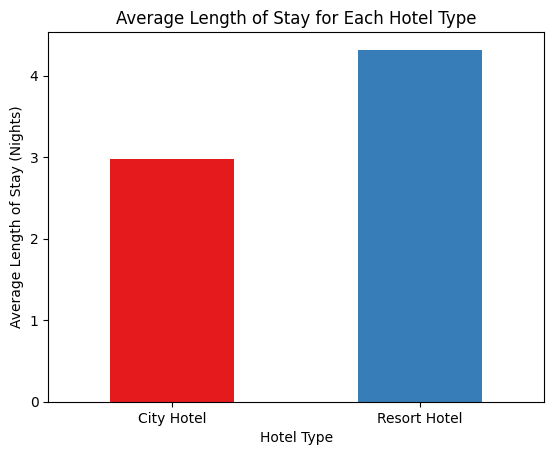

In [22]:
# Calculate average length of stay
df.loc[:, 'length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']  # Use .loc to avoid warnings
avg_length_of_stay = df.groupby('hotel')['length_of_stay'].mean()


colors = sns.color_palette('Set1', len(avg_length_of_stay))
avg_length_of_stay.plot(kind='bar', color=colors)
plt.title('Average Length of Stay for Each Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Length of Stay (Nights)')
plt.xticks(rotation=0)
plt.show()



The average length of stay at resort hotels is significantly longer than at city hotels.One potential strategy for attracting more guests and increasing revenue could be to offer special packages or discounts for longer stays